$\textbf{DS122 - STATISTICAL COMPUTING} \\ \texttt{2Q SY2324}$

MA. ADDINE ANNE T. CARREON

SECTION: A37

DATE SUBMITTED: 01/28/2024

# <center>Pairs Bootstrapping

For this activity, look for a dataset that can perform pairs bootstrapping and regression analysis. Perform the given tasks below and submit the output as an iPyNotebook (.ipynb) file.

1. Data Cleaning & Feature Engineering (If possible)
2. Exploratory Data Analysis
3. Pairs Bootstrapping
4. Regression Analysis

Kindly include the source of the dataset within your submission.

    
Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
cancer = pd.read_csv('cancer.csv')

In [3]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer.shape

(569, 33)

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 1. Data Cleaning and Feature Engineering

In [7]:
# missing values
cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
cancer.drop("Unnamed: 32",axis=1,inplace=True)

In [9]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
# rename
cancer.rename(columns = {'concave points_mean': 'concave_points_mean', 'concave points_worst': 'concave_points_worst'}, inplace = True)

In [12]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 2. Exploratory Data Analysis

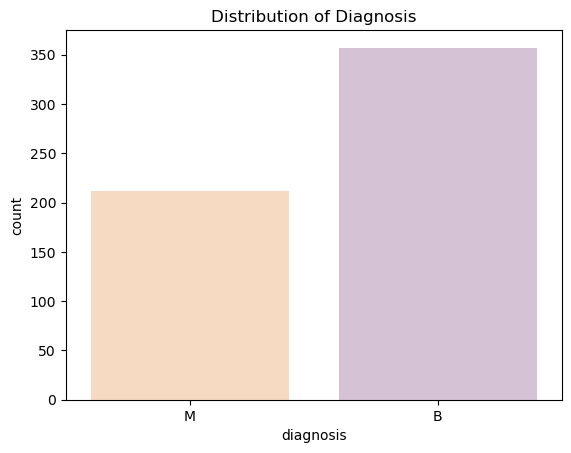

In [13]:
sns.countplot(x='diagnosis', data=cancer, palette=['peachpuff', 'thistle'])
plt.title('Distribution of Diagnosis')
plt.show()

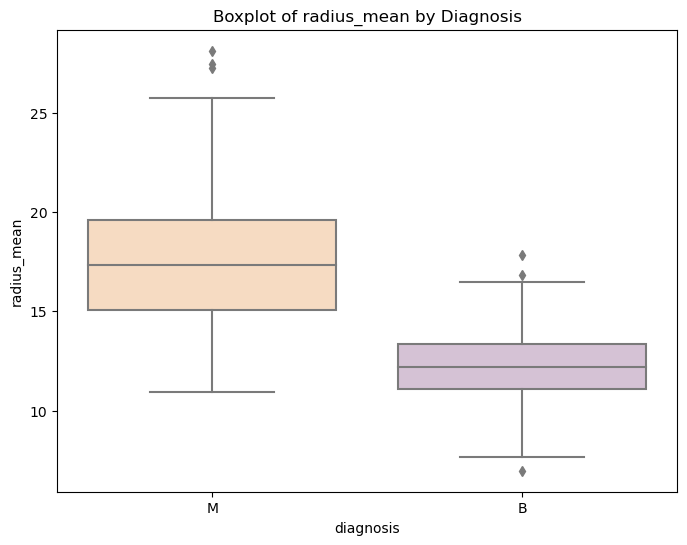

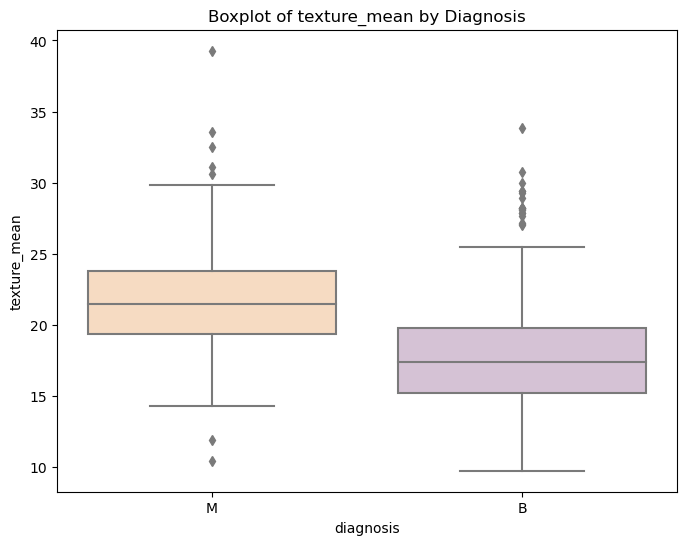

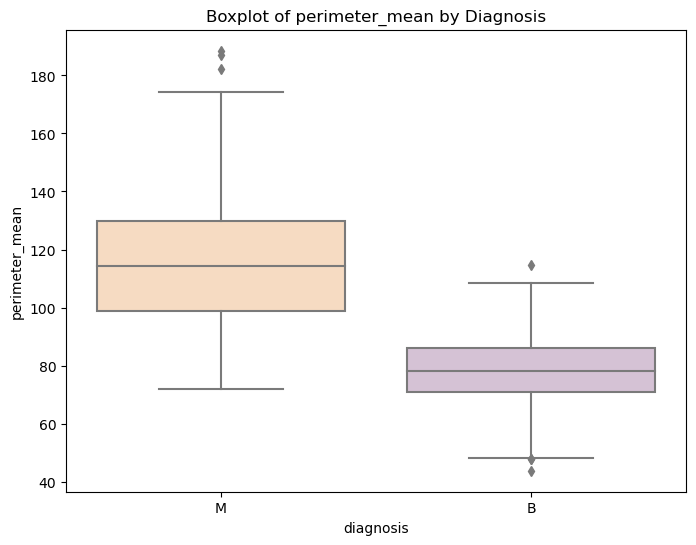

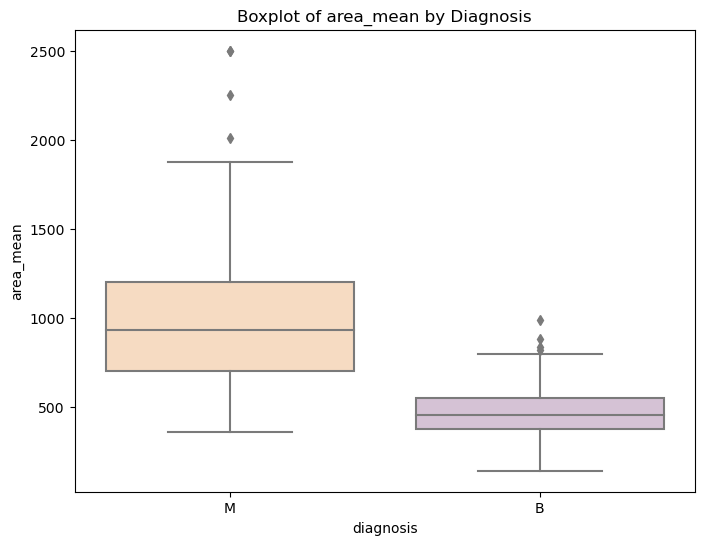

In [14]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='diagnosis', y=feature, data=cancer, palette=['peachpuff', 'thistle'])
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()

C:\Users\Addine Carreon\Downloads\APPS\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


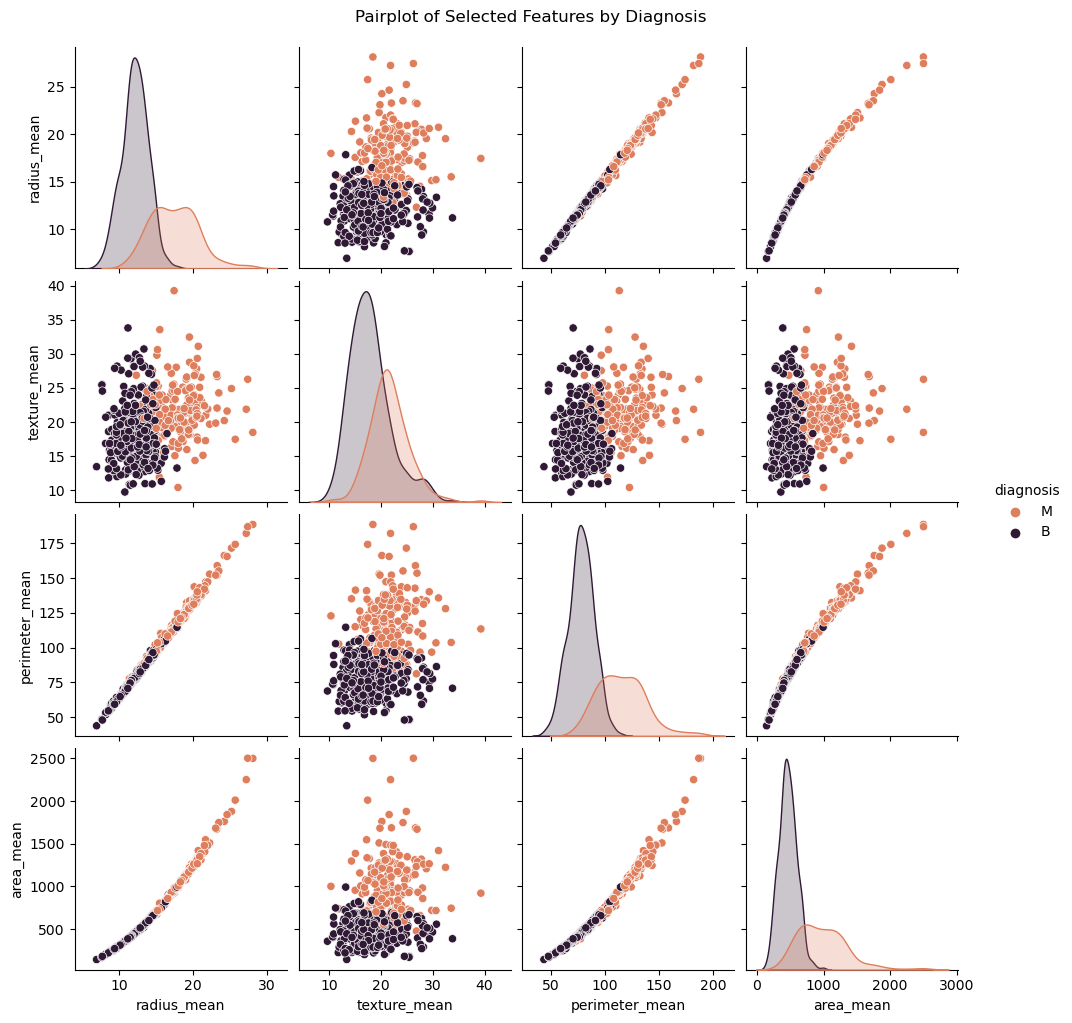

In [15]:
sns.pairplot(cancer, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], palette=['#DE7E5D', '#301934'])
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

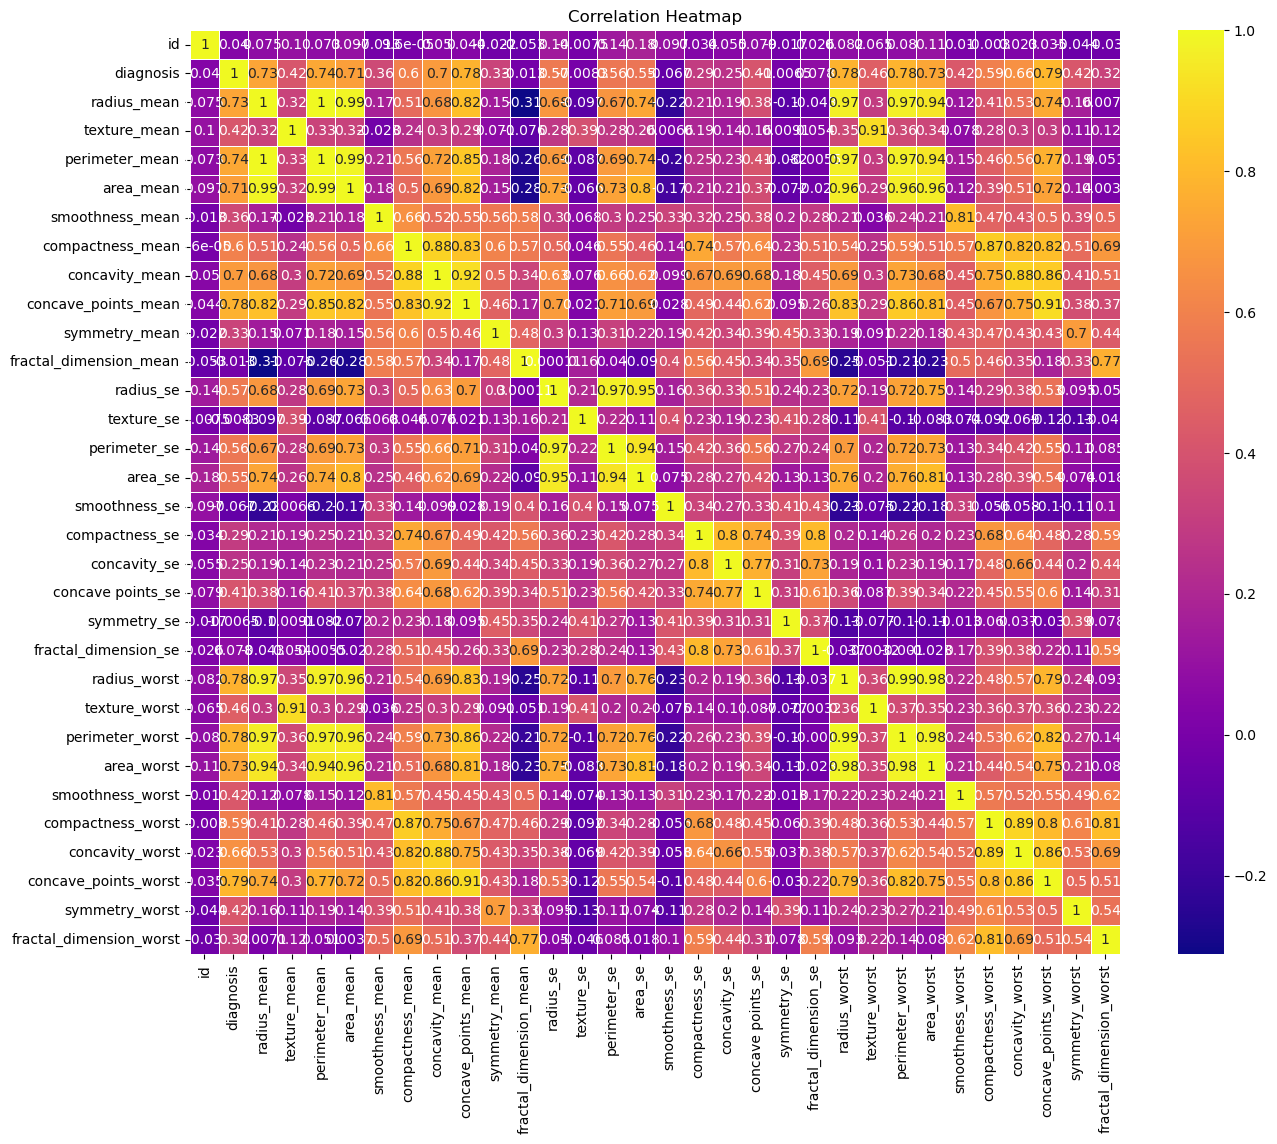

In [16]:
cancer_encoded = cancer.copy()

label_encoder = LabelEncoder()
cancer_encoded['diagnosis'] = label_encoder.fit_transform(cancer_encoded['diagnosis'])

plt.figure(figsize=(15, 12))
sns.heatmap(cancer_encoded.corr(), annot=True, cmap='plasma', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Pairs Bootsrapping

In [17]:
def get_bootstrap_data(data: np.array, size: int) -> np.array:
    x_shape = size
    y_shape = data.size
    
    if size > 1:
        bs_data = np.random.choice(data, size=(x_shape, y_shape))
    else:
        bs_data = np.random.choice(data, size=y_shape)
        
    return bs_data

In [18]:
pb_data = cancer[cancer['diagnosis'] == 'M']
pb_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
BOOTSTRAP_NUM_SAMPLES = 500

bootstrap_indices = get_bootstrap_data(pb_data.index, size=BOOTSTRAP_NUM_SAMPLES)
bootstrap_indices

array([[392,  35, 201, ..., 121, 302,  11],
       [161, 446, 562, ...,  91, 172,  40],
       [186, 328, 237, ..., 444, 198, 351],
       ...,
       [134, 171,  54, ..., 321,  87, 236],
       [433, 567,  29, ..., 368,   0,  32],
       [261, 171,   1, ..., 330,  36,  38]], dtype=int64)

In [20]:
bootstrap_indices.shape

(500, 212)

In [21]:
perimeter_mean_map = np.vectorize(lambda x: pb_data['perimeter_mean'][x])
perimeter_worst_map = np.vectorize(lambda x: pb_data['perimeter_worst'][x])

In [22]:
perimeter_mean_bs_data = perimeter_mean_map(bootstrap_indices)
perimeter_worst_bs_data = perimeter_worst_map(bootstrap_indices)

In [23]:
perimeter_mean_bs_data

array([[102.4 , 110.1 , 115.1 , ..., 121.4 , 134.7 , 103.6 ],
       [126.3 , 117.3 , 103.4 , ..., 100.2 , 102.5 ,  86.18],
       [118.6 , 106.9 , 132.5 , ..., 117.5 , 127.5 , 107.1 ],
       ...,
       [120.2 ,  85.84,  97.26, ..., 131.1 , 122.  , 153.5 ],
       [123.7 , 140.1 , 115.  , ..., 140.9 , 122.8 , 112.8 ],
       [111.  ,  85.84, 132.9 , ..., 105.8 ,  93.63,  95.54]])

In [24]:
perimeter_worst_bs_data

array([[142.1 , 133.5 , 139.5 , ..., 145.4 , 158.8 , 136.5 ],
       [146.6 , 145.4 , 128.7 , ..., 107.5 , 125.  , 102.5 ],
       [139.2 , 129.8 , 161.7 , ..., 133.3 , 166.4 , 119.4 ],
       ...,
       [145.6 , 116.6 , 117.7 , ..., 150.2 , 152.9 , 206.  ],
       [145.3 , 184.6 , 134.9 , ..., 199.5 , 184.6 , 136.1 ],
       [128.2 , 116.6 , 158.8 , ..., 124.3 , 116.2 ,  95.54]])

In [25]:
bs_slopes = np.empty(BOOTSTRAP_NUM_SAMPLES)
bs_intercepts = np.empty(BOOTSTRAP_NUM_SAMPLES)

for i in range(BOOTSTRAP_NUM_SAMPLES):
    slope, intercept = np.polyfit(perimeter_mean_bs_data[i], perimeter_worst_bs_data[i], deg=1)
    bs_slopes[i] = slope
    bs_intercepts[i] = intercept

In [26]:
original_slope, original_intercept = np.polyfit(pb_data['perimeter_mean'], pb_data['perimeter_worst'], deg=1)

Text(0.5, 1.0, 'Regression Fitting with Bootstrap Estimation')

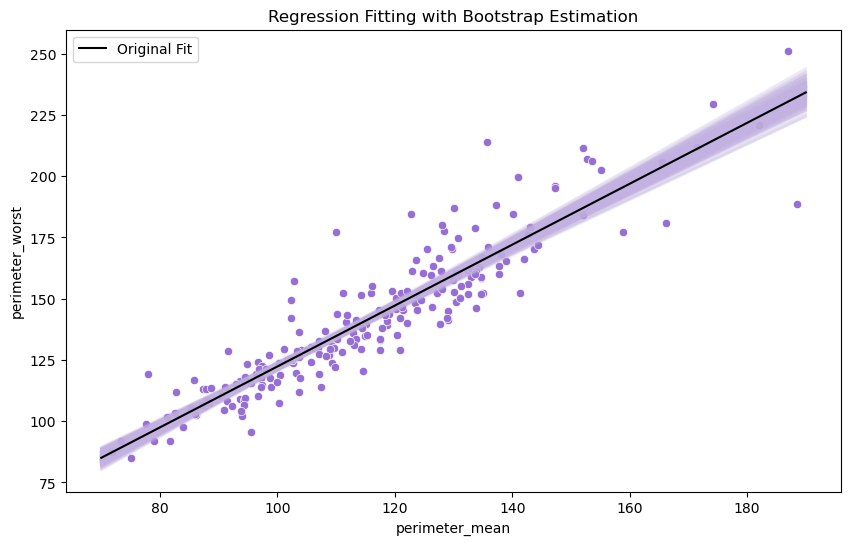

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

x_data = np.arange(70, 210, 20)

for slope, intercept in zip(bs_slopes, bs_intercepts):
    sns.lineplot(x=x_data, y=slope*x_data+intercept, alpha=0.1, errorbar=None, color='#C3B1E1', ax=ax)
    
sns.lineplot(x=x_data, y=original_slope*x_data+original_intercept, errorbar=None, color='black', label='Original Fit', ax=ax)
sns.scatterplot(data=pb_data, x='perimeter_mean', y='perimeter_worst', color='#966FD6', ax=ax)

ax.legend()

ax.set_xlabel('perimeter_mean')
ax.set_ylabel('perimeter_worst')
ax.set_title('Regression Fitting with Bootstrap Estimation')

## 4. Regression Analysis

Mean Squared Error: 63.68635922434047


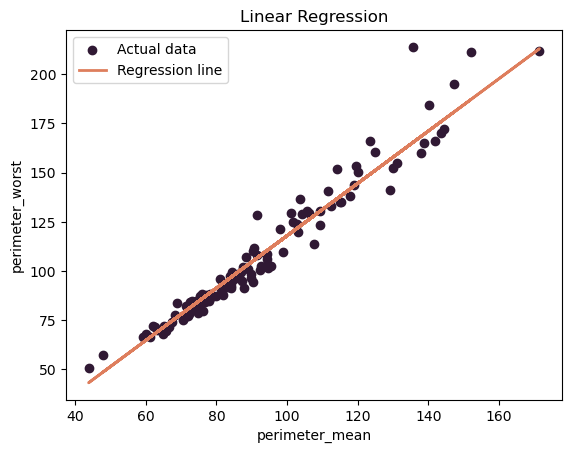

In [28]:
X = cancer[['perimeter_mean']]
y = cancer['perimeter_worst']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(X_test, y_test, color='#301934', label='Actual data')
plt.plot(X_test, y_pred, color='#DE7E5D', linewidth=2, label='Regression line')
plt.xlabel('perimeter_mean')
plt.ylabel('perimeter_worst')
plt.title('Linear Regression')
plt.legend()
plt.show()